In [1]:
import pandas as pd

In [2]:
import requests

In [3]:
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?size=10000&q=*&sort=TimeStamp:desc'


In [4]:
response = requests.get(url=url, auth=auth)

In [5]:
response

<Response [200]>

In [6]:
import json
data = json.loads(response.text)

In [7]:
data

{'took': 543,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'vEGEwH8Bwa_bL2zRyg3r',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm1',
     'Value': 13,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648202399000,
     'Measurement': 'µg/m3'},
    'sort': [1648202399000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'vUGEwH8Bwa_bL2zRyg31',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm10',
     'Value': 24,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648202399000,
     'Measurement': 'µg/m3'},
    'sort': [1648202399000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'y0GEwH8Bwa_bL2zRyw0r',
    '_score': None,
    '_source': {'Source':

In [8]:
data.keys()

dict_keys(['took', 'timed_out', '_shards', 'hits'])

In [9]:
data['hits']

{'total': {'value': 10000, 'relation': 'gte'},
 'max_score': None,
 'hits': [{'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'vEGEwH8Bwa_bL2zRyg3r',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm1',
    'Value': 13,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 1648202399000,
    'Measurement': 'µg/m3'},
   'sort': [1648202399000]},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'vUGEwH8Bwa_bL2zRyg31',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm10',
    'Value': 24,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 1648202399000,
    'Measurement': 'µg/m3'},
   'sort': [1648202399000]},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'y0GEwH8Bwa_bL2zRyw0r',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm25',
    'Value': 20,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 164820239900

In [10]:
from pandas import json_normalize
df2 = json_normalize(data['hits']['hits'])

In [11]:
df2

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,vEGEwH8Bwa_bL2zRyg3r,None,[1648202399000],UradMonitor,pm1,13.0,45.589267,25.464450,1648202399000,µg/m3
1,brasov-dev,_doc,vUGEwH8Bwa_bL2zRyg31,None,[1648202399000],UradMonitor,pm10,24.0,45.589267,25.464450,1648202399000,µg/m3
2,brasov-dev,_doc,y0GEwH8Bwa_bL2zRyw0r,None,[1648202399000],UradMonitor,pm25,20.0,45.589267,25.464450,1648202399000,µg/m3
3,brasov-dev,_doc,XUGEwH8Bwa_bL2zRxg3m,None,[1648202397000],UradMonitor,pm10,23.0,45.704032,25.640955,1648202397000,µg/m3
4,brasov-dev,_doc,p0GEwH8Bwa_bL2zRyg1k,None,[1648202397000],UradMonitor,pm1,8.0,45.704032,25.640955,1648202397000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,brasov-dev,_doc,JEChqn8Bwa_bL2zRw8ZH,None,[1647835157000],UradMonitor,pm25,50.0,45.673977,25.606484,1647835157000,µg/m3
9996,brasov-dev,_doc,70Chqn8Bwa_bL2zRwMWI,None,[1647835156000],UradMonitor,pm25,60.0,45.676195,25.645632,1647835156000,µg/m3
9997,brasov-dev,_doc,8UChqn8Bwa_bL2zRwMWJ,None,[1647835156000],UradMonitor,co2,657.0,45.676195,25.645632,1647835156000,µg/m3
9998,brasov-dev,_doc,8kChqn8Bwa_bL2zRwMWK,None,[1647835156000],UradMonitor,pm10,68.0,45.676195,25.645632,1647835156000,µg/m3


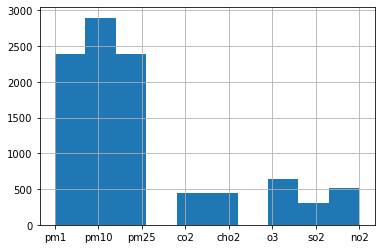

In [12]:
hist = df2.get('_source.Sensor').hist()

In [13]:
so2 = df2[df2.get('_source.Sensor') == 'so2']
so2.head(100)


,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
81,brasov-dev,_doc,7kGEwH8Bwa_bL2zRzw0V,None,[1648198800000],Waqi,so2,2.3,45.654271,25.624061,1648198800000,µg/m3
86,brasov-dev,_doc,8kGEwH8Bwa_bL2zRzw0b,None,[1648198800000],Waqi,so2,2.7,45.649117,25.604136,1648198800000,µg/m3
90,brasov-dev,_doc,-UGEwH8Bwa_bL2zRzw1P,None,[1648198800000],Waqi,so2,1.5,45.716700,25.633300,1648198800000,µg/m3
180,brasov-dev,_doc,Q0FNwH8Bwa_bL2zR4A1W,None,[1648195200000],Waqi,so2,1.6,45.716700,25.633300,1648195200000,µg/m3
183,brasov-dev,_doc,RUFNwH8Bwa_bL2zR4A11,None,[1648195200000],Waqi,so2,2.4,45.654271,25.624061,1648195200000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
3177,brasov-dev,_doc,M0DduX8Bwa_bL2zR7vg-,None,[1648087200000],Waqi,so2,1.4,45.716700,25.633300,1648087200000,µg/m3
3254,brasov-dev,_doc,XkCmuX8Bwa_bL2zR_Pcg,None,[1648083600000],Waqi,so2,2.6,45.649117,25.604136,1648083600000,µg/m3
3260,brasov-dev,_doc,e0CmuX8Bwa_bL2zR_fc0,None,[1648083600000],Waqi,so2,1.5,45.716700,25.633300,1648083600000,µg/m3
3262,brasov-dev,_doc,fUCmuX8Bwa_bL2zR_fc7,None,[1648083600000],Waqi,so2,2.3,45.654271,25.624061,1648083600000,µg/m3


In [14]:
print('Lungime dataframe: ',len(df2))
print('Lungime dataframe pm 1: ',len(so2))

Lungime dataframe:  10000
Lungime dataframe pm 1:  306


In [15]:
print(f"Number of no data values per column:\n{so2.isna().sum()}")

Number of no data values per column:
_index                    0
_type                     0
_id                       0
_score                  306
sort                      0
_source.Source            0
_source.Sensor            0
_source.Value             0
_source.LocationLat       0
_source.LocationLong      0
_source.TimeStamp         0
_source.Measurement       0
dtype: int64


In [16]:
# so2_v2 = so2.drop('_score', inplace=True, axis=1) #method 1
# so2_v2 = so2.drop('_score', axis=1) #method 2
# so2_v2 = so2.loc[:, so2.columns != '_score'] #method3
so2_v2 = so2[[i for i in list(so2.columns) if i != '_score']] #method4
so2_v2.head(6)

,_index,_type,_id,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
81,brasov-dev,_doc,7kGEwH8Bwa_bL2zRzw0V,[1648198800000],Waqi,so2,2.3,45.654271,25.624061,1648198800000,µg/m3
86,brasov-dev,_doc,8kGEwH8Bwa_bL2zRzw0b,[1648198800000],Waqi,so2,2.7,45.649117,25.604136,1648198800000,µg/m3
90,brasov-dev,_doc,-UGEwH8Bwa_bL2zRzw1P,[1648198800000],Waqi,so2,1.5,45.716700,25.633300,1648198800000,µg/m3
180,brasov-dev,_doc,Q0FNwH8Bwa_bL2zR4A1W,[1648195200000],Waqi,so2,1.6,45.716700,25.633300,1648195200000,µg/m3
183,brasov-dev,_doc,RUFNwH8Bwa_bL2zR4A11,[1648195200000],Waqi,so2,2.4,45.654271,25.624061,1648195200000,µg/m3
190,brasov-dev,_doc,TUFNwH8Bwa_bL2zR4Q3R,[1648195200000],Waqi,so2,3.0,45.649117,25.604136,1648195200000,µg/m3


In [17]:
print('Lungime dataframe: ', len(df2))
print('Lungime dataframe pm 1: ', len(so2))
print('Lungime dataframe pm 1 - fara _score: ', len(so2_v2))

Lungime dataframe:  10000
Lungime dataframe pm 1:  306
Lungime dataframe pm 1 - fara _score:  306


In [18]:
print(f"Number of no data values per column:\n{so2_v2.isna().sum()}")

Number of no data values per column:
_index                  0
_type                   0
_id                     0
sort                    0
_source.Source          0
_source.Sensor          0
_source.Value           0
_source.LocationLat     0
_source.LocationLong    0
_source.TimeStamp       0
_source.Measurement     0
dtype: int64


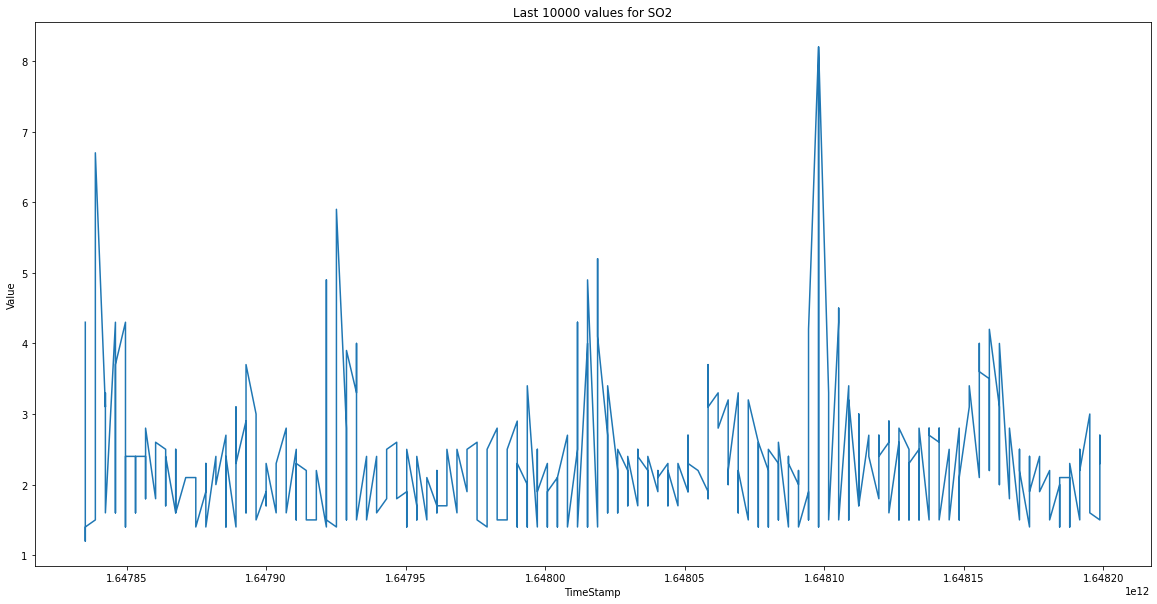

In [19]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(20,10))
plt.plot(so2_v2.get('_source.TimeStamp'), so2_v2.get('_source.Value'))
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for SO2")
plt.savefig('plots/SO2.jpg', dpi = 100, bbox_inches = 'tight')
# fig.savefig('plots/SO2.jpg', dpi = 100, bbox_inches = 'tight')
plt.show()

In [20]:
so2_v2.groupby(['_source.LocationLat','_source.LocationLong']).size().reset_index().rename(columns={0:'count'})

,_source.LocationLat,_source.LocationLong,count
0,45.649117,25.604136,102
1,45.654271,25.624061,102
2,45.716700,25.633300,102


In [21]:
df2.groupby(['_source.LocationLat','_source.LocationLong']).size().reset_index().rename(columns={0:'count'})

,_source.LocationLat,_source.LocationLong,count
0,45.393240,25.442933,306
1,45.589267,25.464450,309
2,45.614267,25.633250,309
3,45.623958,25.481535,307
4,45.634330,25.633872,204
5,45.641274,25.614817,309
6,45.642198,25.588532,162
7,45.645914,25.602642,303
8,45.646976,25.595224,297
9,45.649117,25.604136,408
